Você paga $1$ real e pode lançar quatro dados. Se a soma dos olhos nos dados for inferior a $9$, recebe de volta $10$ reais, caso contrário perde o investimento de $1$ real. Você vai, então, a longo prazo, ganhar ou perder dinheiro ao jogar este jogo?

Importando as bibliotecas necessárias:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Seja $p$ a probabilidade de ser obter uma soma inferior a $9$ no lançamento de quatro dados.

Considerando os lançamentos de cada dado como eventos independentes, o espaço amostral é formado por $6^{4}$ possibilidades distribuídas entre $4$, soma mínima, e $24$, soma máxima.

In [2]:
count = 0
for dado1 in range(1, 7):
  for dado2 in range(1, 7):
    for dado3 in range(1, 7):
      for dado4 in range(1, 7):
        if dado1 + dado2 + dado3 + dado4 < 9: count += 1

p = count / 6 ** 4
print(f'A probabilidade de somar menos que 9 é {p:.4f}')

A probabilidade de somar menos que 9 é 0.0540


Considerando um jogo com probabilidade $p=0.0540$ de sucesso e $q=1-p=0.946$ de derrota, observa-se que a probabilidade de derrota é muito maior que a probalidade de sucesso.

Além disso, o jogo se apresenta como desonesto, pois a razão entre as probabilidades de derrota e vitória é maior que a razão entre o valor de retorno em caso de vitória e o valor pago na aposta:

$$\frac{0.946}{0.054}=17.\overline{518}>\frac{\text{retorno}}{\text{aposta}}=10$$

Assim, é natural que o jogador tenha mais derrotas do que sucessos e os retornos obtidos para os sucessos não compensam as perdas das apostas com derrota.

É natural observar que este sistema possui um Estado Absorvente em 0, e que após uma determinada quantidade de jogadas o jogador perderá todo seu dinheiro.

O modelo para este jogo considera $N$ repetições em que o jogador inicia com saldo $1000$.

Observado o caso em que o saldo final será sempre $0$ após muitas jogadas, o modelo estuda em quantas jogadas, em média, o saldo será zerado. A estrutura é encerrada quando o saldo é zerado ou após $5000$ jogadas (consideração de projeto).

In [30]:
N = 2000            # Número de repetições.
media_perdida = []  # Jogadas em que o saldo foi zerado.

for j in range(1, N):
  i = 0           # Contador de jogadas.
  saldo = [1000]  # Array com o saldo após cada jogada.
  count_vitorias, vitorias_consecutivas = [0, 0]

  while saldo[i] > 0 and i < 5000:
    u = np.random.uniform()
    if u < p:
      saldo.append(saldo[i] + 10)
      count_vitorias += 1
    else:
      saldo.append(saldo[i] - 1)
      vitorias_consecutivas = max(count_vitorias, vitorias_consecutivas)
      count_vitorias = 0

    i += 1

  if len(saldo) != 5000: saldo += [0] * (5000 - len(saldo))
  media_perdida.append(i)

Análise das métricas obtidas:

In [32]:
print(f'O jogador zerou o saldo em {len(media_perdida)/N:.2%} das jogadas.')
print(f'A quantidade média de jogadas para zerar o saldo foi de {np.mean(media_perdida):.0f}.')
print(f'A maior sequência de vitórias foi {vitorias_consecutivas}.')

O jogador zerou o saldo em 99.95% das jogadas.
A quantidade média de jogadas para zerar o saldo foi de 2462.
A maior sequência de vitórias foi 3.


Evidentemente, as jogadas em que o saldo não terminou zerado representam um baixo percentual do total de partidas, além de que o saldo seria zerado caso a quantidade de jogadas fosse maior.

Além disso, a média de jogadas para zerar é influenciada pelo saldo inicial, quanto maior mais tempo até zerar.



O Gráfico a seguir ilustra o comportamento do saldo após cada jogada para a última repetição e evendencia o Estado Absorvente em 0:

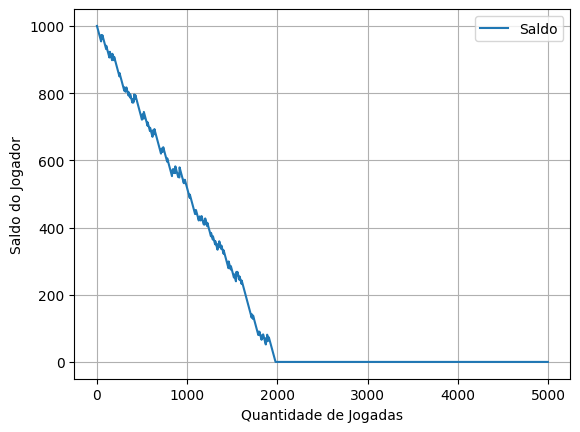

In [33]:
print('\n')

plt.plot(saldo, label='Saldo')
plt.xlabel('Quantidade de Jogadas'); plt.ylabel('Saldo do Jogador')
plt.grid(True); plt.legend(); plt.show()